In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
# set maximum cols to none to display all columns
pd.set_option('display.max_columns', None)

# set maximum text in a cell to 50
pd.set_option('display.max_colwidth', 400)

In [3]:
# read pkl file (excel file has been converted to pkl file for faster reading)
responses = pd.read_pickle("data/responses_df_subset.pkl")
responses.head()

,ResponseId,Variable group,Variable description,Variable options/statements,Value label,Value,Value_weighted,Question,Answer Option
128150,R_3ha8iRZTiAhjRgf,Main reasons that keep people from living (more) sustainably,What are the main reasons that keep you from living (more) sustainably? Maximum of three answers possible.,I don't have time to look into it,Not selected,1,0.887619,Q16,10
128151,R_2wAoiv4LxlEFhKJ,Main reasons that keep people from living (more) sustainably,What are the main reasons that keep you from living (more) sustainably? Maximum of three answers possible.,I don't have time to look into it,Not selected,1,1.228836,Q16,10
128152,R_3rAn5LygpeH8jC1,Main reasons that keep people from living (more) sustainably,What are the main reasons that keep you from living (more) sustainably? Maximum of three answers possible.,I don't have time to look into it,Not selected,1,0.887619,Q16,10
128153,R_3z4lEZQNaC9vF85,Main reasons that keep people from living (more) sustainably,What are the main reasons that keep you from living (more) sustainably? Maximum of three answers possible.,I don't have time to look into it,Not selected,1,0.682167,Q16,10
128154,R_1dgCPpNmC4ke5oE,Main reasons that keep people from living (more) sustainably,What are the main reasons that keep you from living (more) sustainably? Maximum of three answers possible.,I don't have time to look into it,Not selected,1,0.843786,Q16,10


In [4]:
# print the shape of the dataframe, datatypes and memory usage
display(responses.info(memory_usage='deep'))
display(f'{responses.shape} is the shape of the dataframe')

<class 'pandas.core.frame.DataFrame'>
Index: 151217 entries, 128150 to 425457
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ResponseId                   151217 non-null  object 
 1   Variable group               151217 non-null  object 
 2   Variable description         151217 non-null  object 
 3   Variable options/statements  151217 non-null  object 
 4   Value label                  151217 non-null  object 
 5   Value                        151217 non-null  int64  
 6   Value_weighted               151217 non-null  float64
 7   Question                     151217 non-null  object 
 8   Answer Option                151217 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 115.8 MB


None

'(151217, 9) is the shape of the dataframe'

## Analysing the questions that we are going to use of the survey

### 1.	Question 3: Attract the attention of the managers of the companies

In [5]:
# filter on Q3
question3 = responses[responses['Question']=='Q3'].copy()
question3.shape
question3.head()

,ResponseId,Variable group,Variable description,Variable options/statements,Value label,Value,Value_weighted,Question,Answer Option
325501,R_3ha8iRZTiAhjRgf,Contribution of actors to make the Netherlands climate neutral,"Together with other European countries, the Netherlands has agreed to be climate neutral by 2050. This means that the Netherlands wants to emit 95% less CO2 in 2050 than in 1990. How well do you think the Dutch government, business and yourself are working towards this goal?",The Dutch Government,Bad,1,0.887619,Q3,1
325502,R_2wAoiv4LxlEFhKJ,Contribution of actors to make the Netherlands climate neutral,"Together with other European countries, the Netherlands has agreed to be climate neutral by 2050. This means that the Netherlands wants to emit 95% less CO2 in 2050 than in 1990. How well do you think the Dutch government, business and yourself are working towards this goal?",The Dutch Government,Good,1,1.228836,Q3,1
325503,R_3rAn5LygpeH8jC1,Contribution of actors to make the Netherlands climate neutral,"Together with other European countries, the Netherlands has agreed to be climate neutral by 2050. This means that the Netherlands wants to emit 95% less CO2 in 2050 than in 1990. How well do you think the Dutch government, business and yourself are working towards this goal?",The Dutch Government,Very bad,1,0.887619,Q3,1
325504,R_3z4lEZQNaC9vF85,Contribution of actors to make the Netherlands climate neutral,"Together with other European countries, the Netherlands has agreed to be climate neutral by 2050. This means that the Netherlands wants to emit 95% less CO2 in 2050 than in 1990. How well do you think the Dutch government, business and yourself are working towards this goal?",The Dutch Government,Bad,1,0.682167,Q3,1
325505,R_1dgCPpNmC4ke5oE,Contribution of actors to make the Netherlands climate neutral,"Together with other European countries, the Netherlands has agreed to be climate neutral by 2050. This means that the Netherlands wants to emit 95% less CO2 in 2050 than in 1990. How well do you think the Dutch government, business and yourself are working towards this goal?",The Dutch Government,Bad,1,0.843786,Q3,1


In [6]:
# possible answers
question3['Value label'].unique()

array(['Bad', 'Good', 'Very bad', 'Too good (more than necessary)',
       'Neutral', 'Very good'], dtype=object)

In [7]:
question3[question3['ResponseId']=='R_3ha8iRZTiAhjRgf'][['ResponseId', 'Variable options/statements', 'Value label', 'Value']]

,ResponseId,Variable options/statements,Value label,Value
325501,R_3ha8iRZTiAhjRgf,The Dutch Government,Bad,1
328064,R_3ha8iRZTiAhjRgf,The corporate sector,Bad,1
330627,R_3ha8iRZTiAhjRgf,Myself,Good,1


In [8]:
# ordinal encoding of the Value label
# list all answers from very bad to too good
answers = ['Very bad', 'Bad', 'Good', 'Neutral', 'Very good', 'Too good (more than necessary)']

# create a dictionary with the answers as keys and the corresponding numbers as values
answers_dict = {answers[i]:i for i in range(len(answers))}
print(answers_dict)



{'Very bad': 0, 'Bad': 1, 'Good': 2, 'Neutral': 3, 'Very good': 4, 'Too good (more than necessary)': 5}


<Axes: xlabel='count', ylabel='Variable options/statements'>

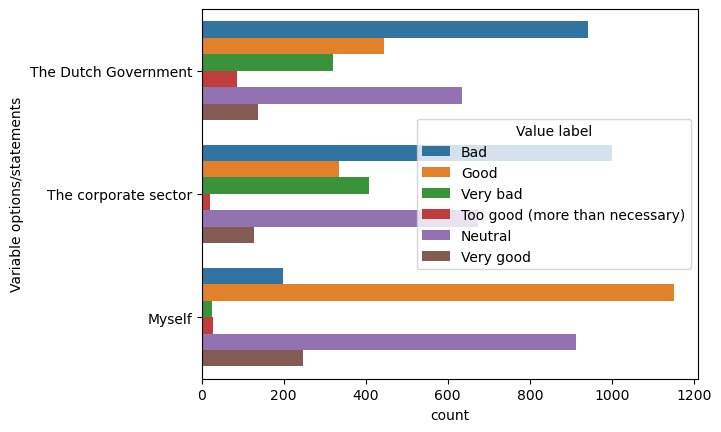

In [9]:
# create a countplot based on 'Value label' and color on 'Variable options/statements'
sns.countplot(data=question3,
              y='Variable options/statements',
              hue='Value label',
            )


In [10]:
question3.to_csv('data output/question3.csv', index=False)

### 2.	Question 17: Explain the opinion of the people. x% of the population thinks that … are responsible for making the Netherlands climate neutral

In [11]:
question17 = responses[responses['Question']=='Q17'].copy()
display(question17.head())
display(question17.shape)

,ResponseId,Variable group,Variable description,Variable options/statements,Value label,Value,Value_weighted,Question,Answer Option
174284,R_3ha8iRZTiAhjRgf,Actors responsible for making the Netherlands climate neutral,"The following set of questions is about measures to reduce CO2 emissions in the Netherlands to be climate neutral by 2050 and who is responsible for doing so. Divide 100 points between the five parties below. The more points you allocate to a party, the more responsibility you believe it has to make the Netherlands climate neutral.",Consumers,20,1,0.887619,Q17,1
174285,R_2wAoiv4LxlEFhKJ,Actors responsible for making the Netherlands climate neutral,"The following set of questions is about measures to reduce CO2 emissions in the Netherlands to be climate neutral by 2050 and who is responsible for doing so. Divide 100 points between the five parties below. The more points you allocate to a party, the more responsibility you believe it has to make the Netherlands climate neutral.",Consumers,5,1,1.228836,Q17,1
174286,R_3rAn5LygpeH8jC1,Actors responsible for making the Netherlands climate neutral,"The following set of questions is about measures to reduce CO2 emissions in the Netherlands to be climate neutral by 2050 and who is responsible for doing so. Divide 100 points between the five parties below. The more points you allocate to a party, the more responsibility you believe it has to make the Netherlands climate neutral.",Consumers,1,1,0.887619,Q17,1
174287,R_3z4lEZQNaC9vF85,Actors responsible for making the Netherlands climate neutral,"The following set of questions is about measures to reduce CO2 emissions in the Netherlands to be climate neutral by 2050 and who is responsible for doing so. Divide 100 points between the five parties below. The more points you allocate to a party, the more responsibility you believe it has to make the Netherlands climate neutral.",Consumers,40,1,0.682167,Q17,1
174288,R_1dgCPpNmC4ke5oE,Actors responsible for making the Netherlands climate neutral,"The following set of questions is about measures to reduce CO2 emissions in the Netherlands to be climate neutral by 2050 and who is responsible for doing so. Divide 100 points between the five parties below. The more points you allocate to a party, the more responsibility you believe it has to make the Netherlands climate neutral.",Consumers,40,1,0.843786,Q17,1


(12815, 9)

In [12]:
question17['Variable description'].unique()

array(['The following set of questions is about measures to reduce CO2 emissions in the Netherlands to be climate neutral by 2050 and who is responsible for doing so. Divide 100 points between the five parties below. The more points you allocate to a party, the more responsibility you believe it has to make the Netherlands climate neutral.'],
      dtype=object)

In [13]:
# distinguish between the different actors
question17['Variable options/statements'].unique()

array(['Consumers', 'Companies', 'Dutch government', 'European Union',
       'Global organisations such as the United Nations'], dtype=object)

In [14]:
# rename the column to 'actor'
question17.rename(columns={'Variable options/statements':'Actor'}, inplace=True)
question17.head(1)

,ResponseId,Variable group,Variable description,Actor,Value label,Value,Value_weighted,Question,Answer Option
174284,R_3ha8iRZTiAhjRgf,Actors responsible for making the Netherlands climate neutral,"The following set of questions is about measures to reduce CO2 emissions in the Netherlands to be climate neutral by 2050 and who is responsible for doing so. Divide 100 points between the five parties below. The more points you allocate to a party, the more responsibility you believe it has to make the Netherlands climate neutral.",Consumers,20,1,0.887619,Q17,1


In [15]:
question17['Value label'].unique()

array(['20', '5', '1', '40', '10', '0', '30', '15', '50', '25', '11',
       '80', '3', '100', '2', '33', '70', '35', '4', '8', '13', '85',
       '45', '18', '7', '60', '6', '44', '90', '43', '12', '14', '55',
       '23', '65', '17', '22', '19', '28', '99', '34', '24', '75', '58',
       '9', '29', '95', '63', '49', '71', '32', '21', '39', '27', '36',
       '37', '16', '38', '26'], dtype=object)

In [16]:
# convert Value label from string to integer
question17['Value label'] = pd.to_numeric(question17['Value label'], errors='coerce')
total_score = question17['Value label'].sum()
total_score

256300

In [17]:
question17_grouped = question17.groupby('Actor')['Value label'].sum().sort_values(ascending=False)/total_score * 100
question17_grouped.reset_index().rename(columns={'Value label': '% of the score allocated to the party (higer = more responsible for sustainability)'})

,Actor,% of the score allocated to the party (higer = more responsible for sustainability)
0,Companies,29.050332
1,Dutch government,23.471713
2,European Union,16.285213
3,Consumers,16.082325
4,Global organisations such as the United Nations,15.110417


In [18]:
question17.head()

,ResponseId,Variable group,Variable description,Actor,Value label,Value,Value_weighted,Question,Answer Option
174284,R_3ha8iRZTiAhjRgf,Actors responsible for making the Netherlands climate neutral,"The following set of questions is about measures to reduce CO2 emissions in the Netherlands to be climate neutral by 2050 and who is responsible for doing so. Divide 100 points between the five parties below. The more points you allocate to a party, the more responsibility you believe it has to make the Netherlands climate neutral.",Consumers,20,1,0.887619,Q17,1
174285,R_2wAoiv4LxlEFhKJ,Actors responsible for making the Netherlands climate neutral,"The following set of questions is about measures to reduce CO2 emissions in the Netherlands to be climate neutral by 2050 and who is responsible for doing so. Divide 100 points between the five parties below. The more points you allocate to a party, the more responsibility you believe it has to make the Netherlands climate neutral.",Consumers,5,1,1.228836,Q17,1
174286,R_3rAn5LygpeH8jC1,Actors responsible for making the Netherlands climate neutral,"The following set of questions is about measures to reduce CO2 emissions in the Netherlands to be climate neutral by 2050 and who is responsible for doing so. Divide 100 points between the five parties below. The more points you allocate to a party, the more responsibility you believe it has to make the Netherlands climate neutral.",Consumers,1,1,0.887619,Q17,1
174287,R_3z4lEZQNaC9vF85,Actors responsible for making the Netherlands climate neutral,"The following set of questions is about measures to reduce CO2 emissions in the Netherlands to be climate neutral by 2050 and who is responsible for doing so. Divide 100 points between the five parties below. The more points you allocate to a party, the more responsibility you believe it has to make the Netherlands climate neutral.",Consumers,40,1,0.682167,Q17,1
174288,R_1dgCPpNmC4ke5oE,Actors responsible for making the Netherlands climate neutral,"The following set of questions is about measures to reduce CO2 emissions in the Netherlands to be climate neutral by 2050 and who is responsible for doing so. Divide 100 points between the five parties below. The more points you allocate to a party, the more responsibility you believe it has to make the Netherlands climate neutral.",Consumers,40,1,0.843786,Q17,1


In [19]:
question17.to_csv('data output/question17.csv', index=False)

### 3. Question 16. What are the primary reasons that hinder Dutch society from adopting more sustainable practices?

In [20]:
question16 = responses[responses['Question']=='Q16'].copy()
question16.head()

,ResponseId,Variable group,Variable description,Variable options/statements,Value label,Value,Value_weighted,Question,Answer Option
128150,R_3ha8iRZTiAhjRgf,Main reasons that keep people from living (more) sustainably,What are the main reasons that keep you from living (more) sustainably? Maximum of three answers possible.,I don't have time to look into it,Not selected,1,0.887619,Q16,10
128151,R_2wAoiv4LxlEFhKJ,Main reasons that keep people from living (more) sustainably,What are the main reasons that keep you from living (more) sustainably? Maximum of three answers possible.,I don't have time to look into it,Not selected,1,1.228836,Q16,10
128152,R_3rAn5LygpeH8jC1,Main reasons that keep people from living (more) sustainably,What are the main reasons that keep you from living (more) sustainably? Maximum of three answers possible.,I don't have time to look into it,Not selected,1,0.887619,Q16,10
128153,R_3z4lEZQNaC9vF85,Main reasons that keep people from living (more) sustainably,What are the main reasons that keep you from living (more) sustainably? Maximum of three answers possible.,I don't have time to look into it,Not selected,1,0.682167,Q16,10
128154,R_1dgCPpNmC4ke5oE,Main reasons that keep people from living (more) sustainably,What are the main reasons that keep you from living (more) sustainably? Maximum of three answers possible.,I don't have time to look into it,Not selected,1,0.843786,Q16,10


In [21]:
question16.to_csv('data output/question16.csv', index=False)

### 4. Question 8. Which sustainable or organic products are most frequently purchased by Dutch society?

In [22]:
question8 = responses[responses['Question']=='Q8'].copy()
question8.head()

,ResponseId,Variable group,Variable description,Variable options/statements,Value label,Value,Value_weighted,Question,Answer Option
402391,R_3ha8iRZTiAhjRgf,Purchase of sustainable/organic products,Which of the following sustainable/organic products do you buy with any regularity? Multiple answers possible.,sustainable/organic clothing and shoes,Not selected,1,0.887619,Q8,11
402392,R_2wAoiv4LxlEFhKJ,Purchase of sustainable/organic products,Which of the following sustainable/organic products do you buy with any regularity? Multiple answers possible.,sustainable/organic clothing and shoes,Not selected,1,1.228836,Q8,11
402393,R_3rAn5LygpeH8jC1,Purchase of sustainable/organic products,Which of the following sustainable/organic products do you buy with any regularity? Multiple answers possible.,sustainable/organic clothing and shoes,Not selected,1,0.887619,Q8,11
402394,R_3z4lEZQNaC9vF85,Purchase of sustainable/organic products,Which of the following sustainable/organic products do you buy with any regularity? Multiple answers possible.,sustainable/organic clothing and shoes,Selected,1,0.682167,Q8,11
402395,R_1dgCPpNmC4ke5oE,Purchase of sustainable/organic products,Which of the following sustainable/organic products do you buy with any regularity? Multiple answers possible.,sustainable/organic clothing and shoes,Selected,1,0.843786,Q8,11


In [23]:
question8.to_csv('data output/question8.csv', index=False)

### 5.    Question 21 - 26: How does Dutch society perceive innovative business models focused on sustainability?

In [24]:
question2126 = responses[responses['Question'].isin(['Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26'])].copy()
question2126.head()

,ResponseId,Variable group,Variable description,Variable options/statements,Value label,Value,Value_weighted,Question,Answer Option
233233,R_3ha8iRZTiAhjRgf,Opinion about companies that sell products of which parts can be replaced easily,There are companies that sell products consisting of parts that can also be bought separately (e.g. a phone or computer). This avoids having to buy a whole new product each time a specific part breaks down or is no longer satisfactory. Replacing parts is easy to do yourself. This extends the life of products and avoids unnecessary waste. What do you think of such companies?,I am afraid the services and products of such companies are too expensive for me,Agree,1,0.887619,Q21,1
233234,R_2wAoiv4LxlEFhKJ,Opinion about companies that sell products of which parts can be replaced easily,There are companies that sell products consisting of parts that can also be bought separately (e.g. a phone or computer). This avoids having to buy a whole new product each time a specific part breaks down or is no longer satisfactory. Replacing parts is easy to do yourself. This extends the life of products and avoids unnecessary waste. What do you think of such companies?,I am afraid the services and products of such companies are too expensive for me,Completely disagree,1,1.228836,Q21,1
233235,R_3rAn5LygpeH8jC1,Opinion about companies that sell products of which parts can be replaced easily,There are companies that sell products consisting of parts that can also be bought separately (e.g. a phone or computer). This avoids having to buy a whole new product each time a specific part breaks down or is no longer satisfactory. Replacing parts is easy to do yourself. This extends the life of products and avoids unnecessary waste. What do you think of such companies?,I am afraid the services and products of such companies are too expensive for me,Agree,1,0.887619,Q21,1
233236,R_3z4lEZQNaC9vF85,Opinion about companies that sell products of which parts can be replaced easily,There are companies that sell products consisting of parts that can also be bought separately (e.g. a phone or computer). This avoids having to buy a whole new product each time a specific part breaks down or is no longer satisfactory. Replacing parts is easy to do yourself. This extends the life of products and avoids unnecessary waste. What do you think of such companies?,I am afraid the services and products of such companies are too expensive for me,Neutral,1,0.682167,Q21,1
233237,R_1dgCPpNmC4ke5oE,Opinion about companies that sell products of which parts can be replaced easily,There are companies that sell products consisting of parts that can also be bought separately (e.g. a phone or computer). This avoids having to buy a whole new product each time a specific part breaks down or is no longer satisfactory. Replacing parts is easy to do yourself. This extends the life of products and avoids unnecessary waste. What do you think of such companies?,I am afraid the services and products of such companies are too expensive for me,Neutral,1,0.843786,Q21,1


In [25]:
# print each question and also add a counter in front of it starting from 1
for i, question in enumerate(question2126['Variable group'].unique(), 1):
    print(f"{question}")




Opinion about companies that sell products of which parts can be replaced easily
Opinion about companies that facilitate collective buying or sharing of goods
Opinion about companies that employ true pricing of their offers
Opinion about initiatives to buy local
Opinion about open-source companies
Opinion about companies with a regenerative business model


In [26]:
# print each question and also add a counter in front of it starting from 1
for i, question in enumerate(question2126['Variable description'].unique(), 1):
    print(f"{i+20}. {question}")


21. There are companies that sell products consisting of parts that can also be bought separately (e.g. a phone or computer). This avoids having to buy a whole new product each time a specific part breaks down or is no longer satisfactory. Replacing parts is easy to do yourself. This extends the life of products and avoids unnecessary waste. What do you think of such companies?
22. There are companies that allow people to buy and share products together (e.g. cars, tools and solar panels), instead of everyone buying these products themselves. Management and maintenance of the products is done by people themselves or by the company. Booking the products is often done via an app. What do you think of such companies?
23. When calculating the price of products, often only production costs and profit are taken into account, but social and environmental costs are not. In the Netherlands, there is an institute that can calculate the fair price (true price) and there are already some companies

Goal is to combine the questions 21-26 into one question. The question is: How does Dutch society perceive innovative business models focused on sustainability?

New dataframe would look like:

In [27]:
# lets decompose the dataframe so that it is easier to understand the structure
# What is the response of one person to all questions 21 to 26? lets take ResponseId R_3ha8iRZTiAhjRgf as an example
one_person_response = question2126[question2126['ResponseId']=='R_3ha8iRZTiAhjRgf']

display(one_person_response['Variable group'].unique())
display(one_person_response)

array(['Opinion about companies that sell products of which parts can be replaced easily',
       'Opinion about companies that facilitate collective buying or sharing of goods',
       'Opinion about companies that employ true pricing of their offers',
       'Opinion about initiatives to buy local',
       'Opinion about open-source companies',
       'Opinion about companies with a regenerative business model'],
      dtype=object)

,ResponseId,Variable group,Variable description,Variable options/statements,Value label,Value,Value_weighted,Question,Answer Option
233233,R_3ha8iRZTiAhjRgf,Opinion about companies that sell products of which parts can be replaced easily,There are companies that sell products consisting of parts that can also be bought separately (e.g. a phone or computer). This avoids having to buy a whole new product each time a specific part breaks down or is no longer satisfactory. Replacing parts is easy to do yourself. This extends the life of products and avoids unnecessary waste. What do you think of such companies?,I am afraid the services and products of such companies are too expensive for me,Agree,1,0.887619,Q21,1
235796,R_3ha8iRZTiAhjRgf,Opinion about companies that sell products of which parts can be replaced easily,There are companies that sell products consisting of parts that can also be bought separately (e.g. a phone or computer). This avoids having to buy a whole new product each time a specific part breaks down or is no longer satisfactory. Replacing parts is easy to do yourself. This extends the life of products and avoids unnecessary waste. What do you think of such companies?,I think more companies should do this,Agree,1,0.887619,Q21,2
238359,R_3ha8iRZTiAhjRgf,Opinion about companies that sell products of which parts can be replaced easily,There are companies that sell products consisting of parts that can also be bought separately (e.g. a phone or computer). This avoids having to buy a whole new product each time a specific part breaks down or is no longer satisfactory. Replacing parts is easy to do yourself. This extends the life of products and avoids unnecessary waste. What do you think of such companies?,I would like to become a customer of such companies,Agree,1,0.887619,Q21,3
240922,R_3ha8iRZTiAhjRgf,Opinion about companies that sell products of which parts can be replaced easily,There are companies that sell products consisting of parts that can also be bought separately (e.g. a phone or computer). This avoids having to buy a whole new product each time a specific part breaks down or is no longer satisfactory. Replacing parts is easy to do yourself. This extends the life of products and avoids unnecessary waste. What do you think of such companies?,I doubt that this is really sustainable,Agree,1,0.887619,Q21,4
243485,R_3ha8iRZTiAhjRgf,Opinion about companies that facilitate collective buying or sharing of goods,"There are companies that allow people to buy and share products together (e.g. cars, tools and solar panels), instead of everyone buying these products themselves. Management and maintenance of the products is done by people themselves or by the company. Booking the products is often done via an app. What do you think of such companies?",I am afraid the services and products of such companies are too expensive for me,Disagree,1,0.887619,Q22,1
246048,R_3ha8iRZTiAhjRgf,Opinion about companies that facilitate collective buying or sharing of goods,"There are companies that allow people to buy and share products together (e.g. cars, tools and solar panels), instead of everyone buying these products themselves. Management and maintenance of the products is done by people themselves or by the company. Booking the products is often done via an app. What do you think of such companies?",I think more companies should do this,Agree,1,0.887619,Q22,2
248611,R_3ha8iRZTiAhjRgf,Opinion about companies that facilitate collective buying or sharing of goods,"There are companies that allow people to buy and share products together (e.g. cars, tools and solar panels), instead of everyone buying these products themselves. Management and maintenance of the products is done by people themselves or by the company. Booking the products is often done via an app. What do you think of such companies?",I would like to become a customer of such companies,Disagree,1,0.887619,Q22,3
251174,R_3ha8iRZTiAhjRgf,Opinion about companies that f

In [28]:
filter = (one_person_response['Variable options/statements'] == 'I would like to become a customer of such companies') & (one_person_response['Question']=='Q21')
one_person_response[filter]

,ResponseId,Variable group,Variable description,Variable options/statements,Value label,Value,Value_weighted,Question,Answer Option
238359,R_3ha8iRZTiAhjRgf,Opinion about companies that sell products of which parts can be replaced easily,There are companies that sell products consisting of parts that can also be bought separately (e.g. a phone or computer). This avoids having to buy a whole new product each time a specific part breaks down or is no longer satisfactory. Replacing parts is easy to do yourself. This extends the life of products and avoids unnecessary waste. What do you think of such companies?,I would like to become a customer of such companies,Agree,1,0.887619,Q21,3


In [29]:
filter = (question2126['Variable options/statements'] == 'I would like to become a customer of such companies') & (question2126['Question']=='Q21')

question21 = question2126[filter].copy()
question21.head(2)

,ResponseId,Variable group,Variable description,Variable options/statements,Value label,Value,Value_weighted,Question,Answer Option
238359,R_3ha8iRZTiAhjRgf,Opinion about companies that sell products of which parts can be replaced easily,There are companies that sell products consisting of parts that can also be bought separately (e.g. a phone or computer). This avoids having to buy a whole new product each time a specific part breaks down or is no longer satisfactory. Replacing parts is easy to do yourself. This extends the life of products and avoids unnecessary waste. What do you think of such companies?,I would like to become a customer of such companies,Agree,1,0.887619,Q21,3
238360,R_2wAoiv4LxlEFhKJ,Opinion about companies that sell products of which parts can be replaced easily,There are companies that sell products consisting of parts that can also be bought separately (e.g. a phone or computer). This avoids having to buy a whole new product each time a specific part breaks down or is no longer satisfactory. Replacing parts is easy to do yourself. This extends the life of products and avoids unnecessary waste. What do you think of such companies?,I would like to become a customer of such companies,Completely disagree,1,1.228836,Q21,3


In [30]:
question2126.groupby(['Question'])['Value_weighted'].sum().round(1)

Question
Q21    10254.6
Q22    10254.6
Q23    10254.6
Q24    10254.6
Q25    10254.6
Q26    10254.6
Name: Value_weighted, dtype: float64

In [31]:
question2126.groupby(['Question', 'Value label'])['Value_weighted'].sum().to_clipboard()

In [32]:
question2126.to_csv('data output/question21_26.csv', index=False)